In [1]:
from src.predict import predict
from src.gradient_descent import descent
from src.compute_cost import cost_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

 # City Profit
 This was an assignment on Andrew Ng's Machine Learning Course. I've already done the exercise in Octave, this project is to help me get familiar with the different libraries in Python.
 ## Problem
 Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
 ## Data
 The file *data.txt* contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

 ## Linear Regression
 Read the *data.txt* and peek at it's content using Pandas

In [2]:
df = pd.read_csv('data/data.txt', names=['City Population', 'Profit'])
df.head()


,City Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


  Next, use Matplotlib to visualize the data

  The pyplot.scatter is helpful in plotting each data entry as individual points.

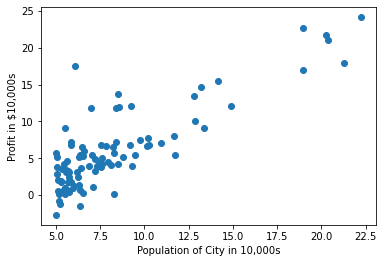

In [3]:
# Read X values and Y values
df_x, df_y = df.iloc[:, 0], df.iloc[:, 1]

# Visualize data
fig, ax = plt.subplots()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
ax.scatter(df_x, df_y)


 Just from looking at the data, it is fair to say that as the population increase so does the profit.

 The main goal of Linear Regression is to try and draw a line that will fit all these points, or at least minimize the average distance from all points in respect to their Y-values.

 There are libraries that can run Linear Regression, for this exercise I ran my own.

 These are the three formulas needed to run Linear Regression (without normalization):
 - Hypothesis
 ![hypothesis](./docs/hypothesis.png)
 - JCost (number to minimize)
 ![jcost](./docs/jcost.png)
 - Gradient Descent (update values for theta)
 ![descent](./docs/descent.png)


 Set up the necessary variables in one cell, that way it's easy to reset the values.

 *Note: alpha and iterations are both used for Gradient Descent. You'll have to play around with different values that suits your data and problem.*

In [4]:
# Set up all variables in 1 cell
m = len(df)
X = df_x.to_numpy()
Y = df_y.to_numpy()


# Will be used for gradient descent
alpha = 0.01
iterations = 500

print(f'Variables set, alpha={alpha} and iterations={iterations}')


Variables set, alpha=0.01 and iterations=500


 Notice in the hypothesis that there is a value for theta 0 and a hidden feature X 0 which is just equal to 1

 Add in the 1s column correspending to this feature X0

In [5]:
X_1 = np.c_[np.ones(m), X]


 ## J Cost
 To compute for the cost function, call the *cost_function* in *compute_cost.py*
  ```python
  def cost_function(X: np.array, Y: np.array, theta: np.array, alpha):
      m = len(Y)
      h = X.dot(theta)
      return ((h - Y) ** 2).sum() / (2 * m)
  ```
 This function just follows the formula given above using X, Y, theta and alpha.

 Confirm this function is working, test using an initial *theta=\[0, 0\]*

 The expected result should be **32.07**

In [6]:
# Initial theta values
theta = np.zeros(2)
print(cost_function(X_1, Y, theta, alpha))


32.072733877455676


 ## Gradient Descent
 Once the JCost is functioning correctly, proceed with Gradient Descent

 Using the *gradient_descent.py*, import the *descent* function
 ```python
  def descent(X: np.array, Y: np.array, theta: np.array, alpha):
      m = len(Y)
      h = X.dot(theta)
      theta = theta - (X.transpose().dot(h - Y) * (alpha / m))
 ```
 Again, given X, Y, theta and alpha, the function just follows the formula for Gradient Descent and returns the updated theta value.

 Run the gradient descent using the number of iterations provided in the cell above. This will now minimize JCost per iteration, to see this, keep track of the JCost values and theta values.

 *Note that JCost isn't directly changed, the theta values are responsible for minimizing the JCost function.*

In [7]:
theta = np.zeros(2)
j_hist = []
theta_hist = []
for i in range(iterations):
    j_hist.append(cost_function(X_1, Y, theta, alpha))
    theta_hist.append(theta)
    theta = descent(X_1, Y, theta, alpha)

print("Training done!")
print(f"Final JCost: {j_hist[-1]}")


Training done!
Final JCost: 4.7146656923272445


 ## Hypothesis
 After the optimal values for theta in the given iteration was found, prediction can now be done using the Hypothesis formula.

 Visualize the linear fit for the hypothesis.

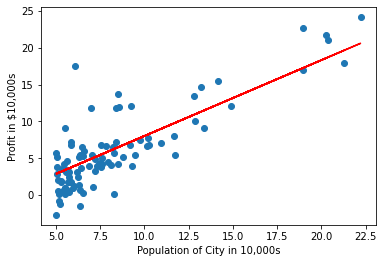

In [8]:
ax.plot(X, X_1.dot(theta), 'r')
fig

 ## Predicting Profit
 Using the helper script predict, input any number of City Population and get a prediction.
 *The script automatically normalizes the value to fit the prediction.*
 ```python
 def predict(population, theta):
     # Normalize given population
     population /= 10000
     x = np.array([1, population])
     return x.transpose().dot(theta) * 10000
 )
 ```

The predicted profit for City with population 75000:
$54,496.25


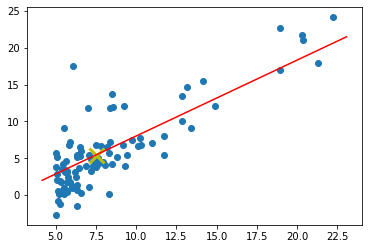

In [9]:
# Feel free to play with this cell to input any population
population = 75000
p = predict(population, theta)
print(
    f'The predicted profit for City with population {population}:\n${p:,.2f}')

# Plot the result in respect with linear prediction
res_fig, res_ax = plt.subplots()
x, y = population/10000, p/10000
res_ax.plot(x, y, 'yx', mew=3, ms=15)
res_ax.scatter(df_x, df_y)
x_lim = res_ax.get_xlim()
x_lim_1 = np.c_[np.ones(len(x_lim)), np.array(x_lim)]
y_lim = x_lim_1.dot(theta)
res_ax.plot(x_lim, y_lim, 'r')
